In [351]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter


In [352]:
data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/DS Exercise 3/MPS_cleanv1.csv")
data.head(10)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.drop(columns=['Location', 'A'], axis = 1, inplace = True)
data.head(5)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Target,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,0,1


In [353]:
cols_at_end = ['Target']
data = data[[c for c in data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in data]]

data.head(5)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A,Target
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1,0
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1,0


In [354]:
#Model Building

# Defining regressand(Y) and regressors(X)

X=data[['ComponentAge','MonthlyRunTime','FlowRate','MaxOutputRate','Sensor1','Sensor2','Sensor3','Sensor4','Sensor5','Sensor5.1','DaysSinceMaintenance','Location A']]
Y=data['Target']

#Creating dummy variables for categorical variables using inbuilt function from Pandas

X = pd.get_dummies(data=X, drop_first=True)
X.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [355]:
#Drop weak variables
#X.drop(columns=['Location', 'A'], axis = 1, inplace = True)
X.head(5)

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1


In [356]:
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int


In [357]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_classif(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores[1:12]

FlowRate                0.080328
Sensor5.1               0.053523
Sensor2                 0.033033
MaxOutputRate           0.029761
Sensor5                 0.022574
Sensor3                 0.018328
DaysSinceMaintenance    0.016543
ComponentAge            0.012835
Location A              0.010576
Sensor4                 0.004798
Sensor1                 0.004709
Name: MI Scores, dtype: float64

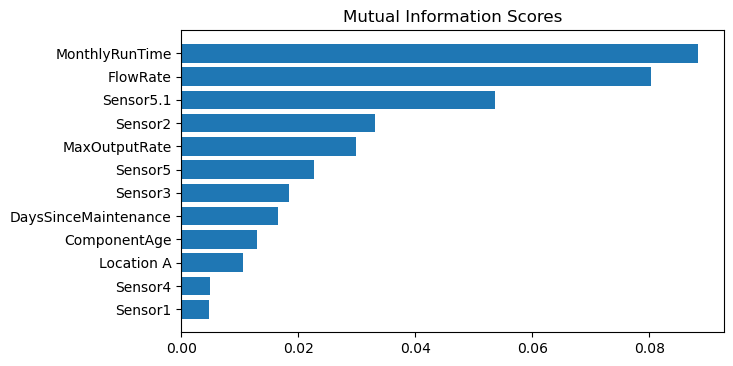

In [358]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(7, 4))
plot_mi_scores(mi_scores)

The results suggest perhaps four of the 10 features as being important to prediction.
MonthlyRunTime	
FlowRate	
MaxOutputRate	
Sensor2	
Sensor3	
Sensor5	
Sensor5.1

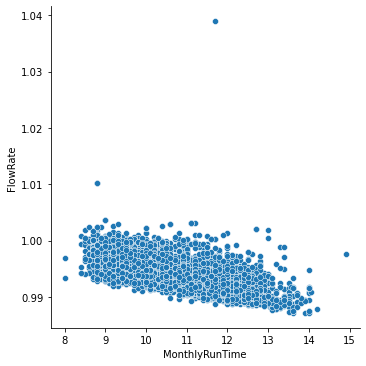

In [359]:
sns.relplot(x="MonthlyRunTime",y="FlowRate", data=data);

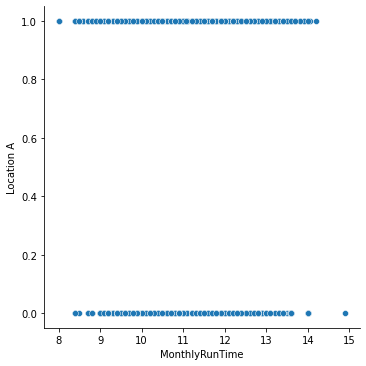

In [360]:
sns.relplot(x="MonthlyRunTime",y="Location A", data=data);

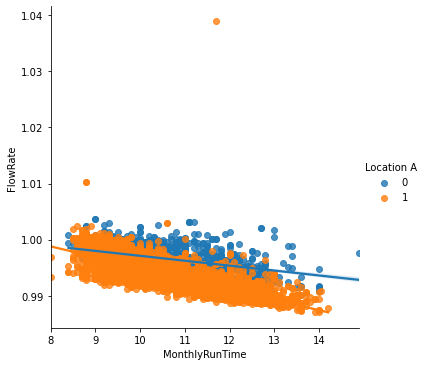

In [361]:
sns.lmplot(x="MonthlyRunTime", y="FlowRate", hue="Location A", data=data);

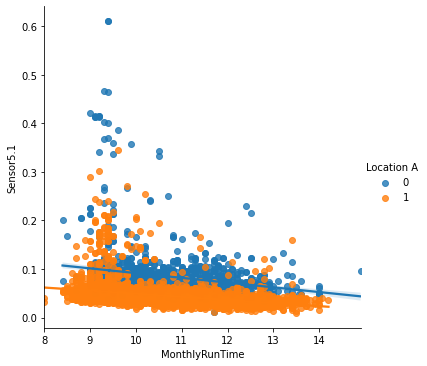

In [362]:
sns.lmplot(x="MonthlyRunTime", y="Sensor5.1", hue="Location A", data=data);

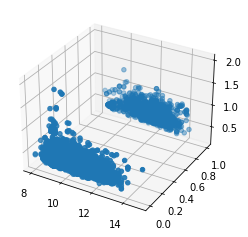

In [363]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['MonthlyRunTime'], data['Target'], data['ComponentAge'])

In [364]:
#Splitting the dataset for training(80%) and testing(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


In [365]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1037
           1       0.59      0.59      0.59       256

    accuracy                           0.84      1293
   macro avg       0.74      0.74      0.74      1293
weighted avg       0.84      0.84      0.84      1293

0.16395978344934262


UnderSample Method

In [366]:
data['Target'].value_counts()

0    5192
1    1271
Name: Target, dtype: int64

In [367]:
#class count
count_class_0, count_class_1 = data.Target.value_counts()

#divide by class
data_class_0 = data[data['Target']==0]
data_class_1 = data[data['Target']==1]

In [368]:
data_class_0.shape

(5192, 13)

In [369]:
data_class_1.shape

(1271, 13)

In [370]:
data_class_0_under = data_class_0.sample(count_class_1)

data_concate_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_concate_under['Target'].value_counts()

data_concate_under.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A,Target
5987,0.53,9.1,0.99884,180.0,7.5,13.1,0.24,3.05,0.31,0.050,26.0,1,0
4659,0.41,12.1,0.98894,101.0,6.1,1.5,0.28,3.03,0.26,0.030,25.0,1,0
878,0.57,11.6,0.99120,101.0,6.6,1.7,0.28,3.29,0.36,0.038,22.0,1,0
5092,0.58,10.2,0.99590,30.0,6.9,2.3,0.49,3.42,0.10,0.074,12.0,0,0
3074,0.33,10.4,0.99310,151.0,7.6,2.0,0.54,3.04,0.23,0.029,13.0,1,0


In [371]:
X = data_concate_under.drop('Target', axis=1)
y = data_concate_under['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2033, 12)
(509, 12)
(2033,)
(509,)


In [372]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       258
           1       0.72      0.81      0.76       251

    accuracy                           0.75       509
   macro avg       0.76      0.75      0.75       509
weighted avg       0.76      0.75      0.75       509

0.2475442043222004


In [373]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.270743
Sensor3,0.117437
FlowRate,0.081634
Sensor2,0.079897
Sensor5,0.078636
MaxOutputRate,0.073437
Sensor4,0.068412
Sensor1,0.064580
DaysSinceMaintenance,0.059255
ComponentAge,0.055573


Method 2: Oversample

In [374]:
count_class_0, count_class_1

(5192, 1271)

In [375]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)

data_class_over = pd.concat([data_class_1_over, data_class_0],axis=0)

In [376]:
X = data_class_over.drop('Target', axis=1)
y = data_class_over['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [377]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1010
           1       0.92      0.99      0.96      1067

    accuracy                           0.95      2077
   macro avg       0.96      0.95      0.95      2077
weighted avg       0.96      0.95      0.95      2077

0.04766490129995185


In [378]:
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.280428
Sensor3,0.107764
Sensor5,0.076381
ComponentAge,0.074519
Sensor2,0.074473
MaxOutputRate,0.070085
Sensor4,0.066509
FlowRate,0.066104
Sensor1,0.062013
DaysSinceMaintenance,0.061300


In [379]:
data.head()

,ComponentAge,MonthlyRunTime,FlowRate,MaxOutputRate,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor5.1,DaysSinceMaintenance,Location A,Target
0,0.55,9.5,0.99740,32.0,10.0,1.90,0.580,3.13,0.22,0.080,9.0,0,0
1,0.32,12.7,0.99184,28.0,6.9,10.55,0.300,3.07,0.30,0.037,4.0,1,0
2,0.57,9.7,0.99743,86.0,7.2,2.30,0.660,3.53,0.03,0.078,16.0,0,0
3,0.50,9.5,0.99593,84.0,7.1,1.80,0.755,3.19,0.15,0.107,20.0,0,0
4,0.44,10.8,0.99280,127.0,7.0,4.90,0.290,3.17,0.37,0.034,26.0,1,0


method3: SMOTE

In [380]:
X = data.drop('Target', axis=1)
y = data['Target']

In [381]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [382]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8307, 12)
(2077, 12)
(8307,)
(2077,)


In [383]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
print(classification_report(y_test,base_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1046
           1       0.84      0.86      0.85      1031

    accuracy                           0.85      2077
   macro avg       0.85      0.85      0.85      2077
weighted avg       0.85      0.85      0.85      2077

0.15214251324025035


In [384]:
#Calculate Feature Importance
pd.DataFrame(index=X_sm.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.316368
Sensor3,0.102979
Sensor2,0.093758
Sensor1,0.070068
DaysSinceMaintenance,0.068664
ComponentAge,0.067426
Sensor5.1,0.061671
Sensor5,0.061196
MaxOutputRate,0.060690
Sensor4,0.055450


Method4: Use of Ensemble with undersampling

In [385]:
X = data.drop('Target', axis=1)
y = data['Target']

In [386]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 12)
(1293, 12)
(5170,)
(1293,)


In [387]:
y_train.value_counts()
4155/4

1038.75

In [388]:
data_3 = X_train.copy()
data_3['Target'] = y_train

In [389]:
y_train.value_counts()

0    4155
1    1015
Name: Target, dtype: int64

In [390]:
data_3class0 = data_3[data_3.Target==0]
data_3class1 = data_3[data_3.Target==1]

In [391]:
data_3class0.shape, data_3class1.shape


((4155, 13), (1015, 13))

In [392]:
def get_train_batch(data_majority, data_minority, start, end):
    data3_train = pd.concat([data_majority[start:end], data_minority], axis=0)
    
    data3_train.shape
    X_train = data3_train.drop('Target', axis=1)
    y_train = data3_train['Target']

    return X_train, y_train

In [393]:
X_train, y_train = get_train_batch(data_3class0, data_3class1, 0, 1015)

X_train.shape

(2030, 12)

In [394]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

0.262954369682908


In [395]:
X_train, y_train = get_train_batch(data_3class0, data_3class1, 1015, 2030)
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
base_preds = model1.predict(X_test)
from sklearn.metrics import classification_report,plot_confusion_matrix
#Calculate Feature Importance
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, base_preds))

0.2397525135344161


Logistic Regression

In [409]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LogisticRegression

In [406]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
lm= log_model.fit(X_train,y_train)
log_preds = log_model.predict(X_test)



C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [407]:
log_model.score(X_test,y_test)

0.8089713843774169

In [408]:
log_model.predict_proba(X_test)

array([[0.97357505, 0.02642495],
       [0.96160604, 0.03839396],
       [0.96011075, 0.03988925],
       ...,
       [0.53310361, 0.46689639],
       [0.78702976, 0.21297024],
       [0.94373302, 0.05626698]])

In [410]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
MonthlyRunTime,0.212600
Sensor2,0.108017
Sensor5,0.092982
ComponentAge,0.086051
DaysSinceMaintenance,0.082678
FlowRate,0.082155
Sensor5.1,0.078434
Sensor4,0.075567
Sensor1,0.064281
Sensor3,0.060688


In [411]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score, confusion_matrix
print(classification_report(y_test,log_preds))
# get predicted prices on validation data using training data
print(mean_absolute_error(y_test, log_preds))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1037
           1       0.56      0.18      0.27       256

    accuracy                           0.81      1293
   macro avg       0.69      0.57      0.58      1293
weighted avg       0.77      0.81      0.77      1293

0.19102861562258314


In [412]:
accuracy_score(y_test,log_preds)

0.8089713843774169

In [413]:
confusion_matrix(y_test,log_preds)


array([[1001,   36],
       [ 211,   45]], dtype=int64)

C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


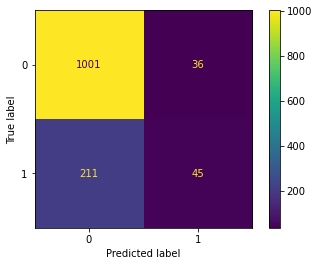

In [414]:
plot_confusion_matrix(log_model, X_test,y_test)

C:\Users\olowe_m\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


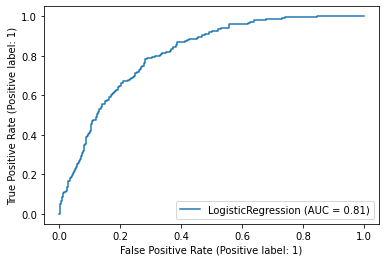

In [415]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(log_model, X_test,y_test)

The results suggest perhaps four of the 10 features as being important to prediction.
MonthlyRunTime	
MaxOutputRate	
Sensor1	
DaySinceMaintenance
Location A

Random Forest

In [420]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
iowa_preds = forest_model.predict(X_test)

In [421]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(n_estimators =40, random_state = 1)
forest.fit(X_train,y_train)  
y_pred = forest.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

#Accuracy score of the Random Forest Regression model
print("Random Forest Regression score : ",forest.score(X_test,y_test))

0.20939393939393938
Random Forest Regression score :  0.5656926267281106
